In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('../db/linear_reg_prac.csv', index_col=0).rename(columns={"MedHouseVal": "target"})
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
id,,,,,,,,,
0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500
...,...,...,...,...,...,...,...,...,...
37132,3.3438,50.0,4.936508,1.079365,1775.0,3.022222,34.19,-118.36,1.856
37133,3.7308,26.0,5.087533,0.966019,1006.0,4.316901,37.32,-121.86,1.588
37134,4.1716,52.0,4.678862,1.101485,1156.0,1.431734,37.75,-122.44,3.387


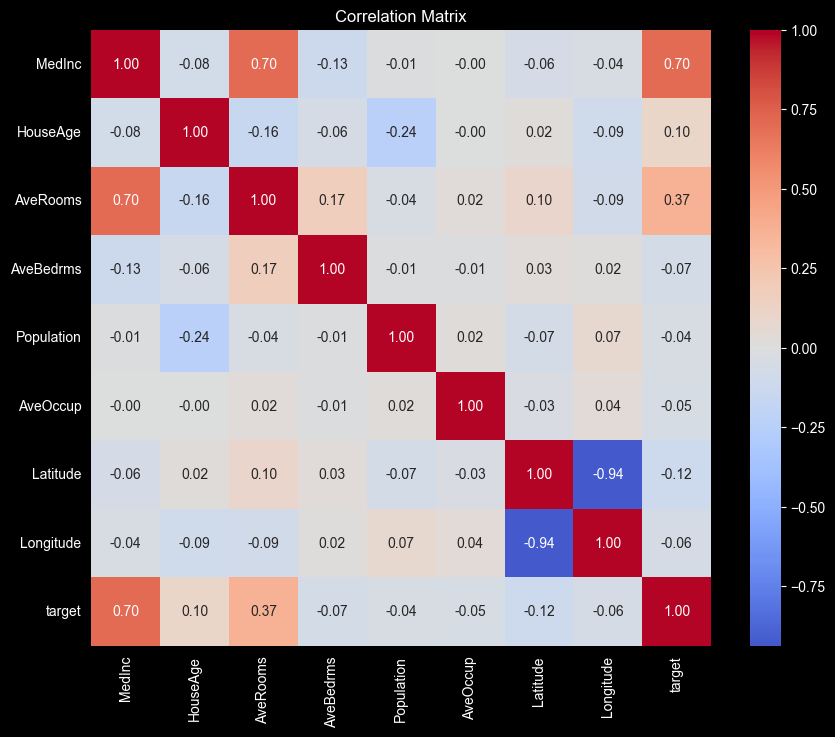

In [3]:
plt.figure(figsize=(10,8))
corr = df.corr()

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)

plt.title("Correlation Matrix")
plt.show()

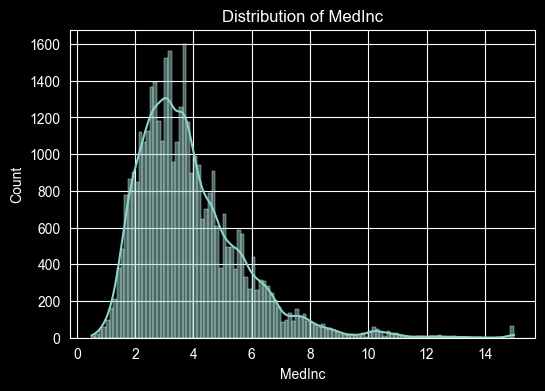

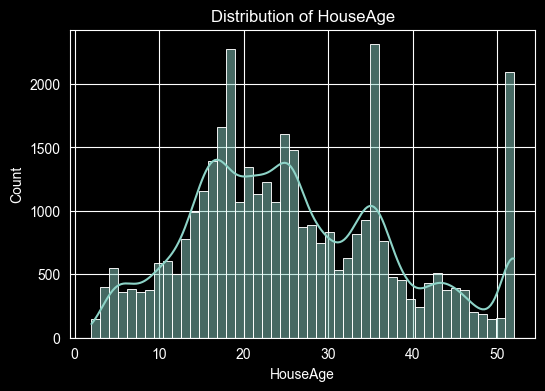

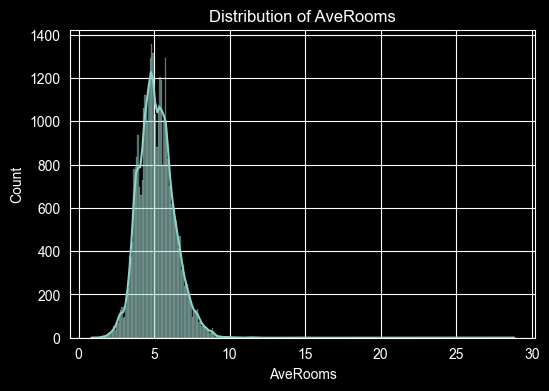

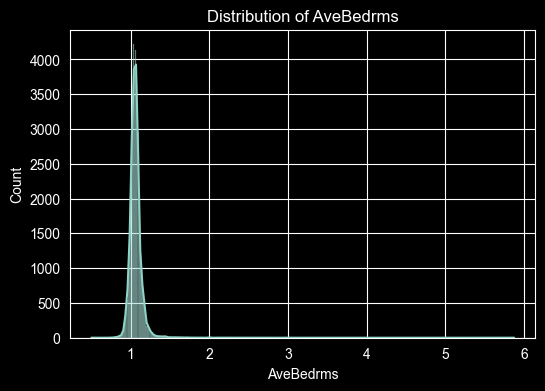

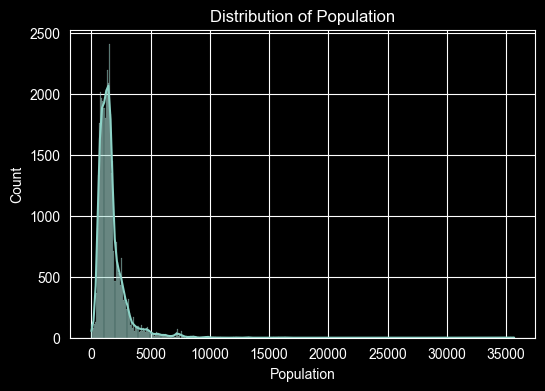

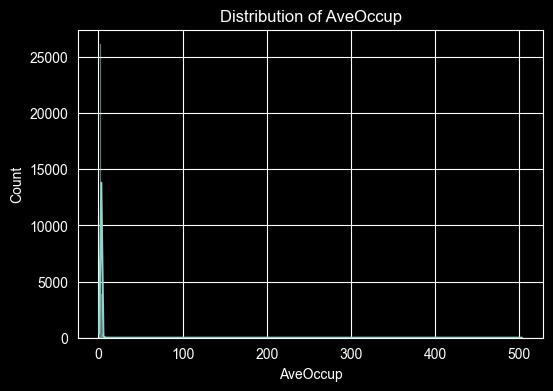

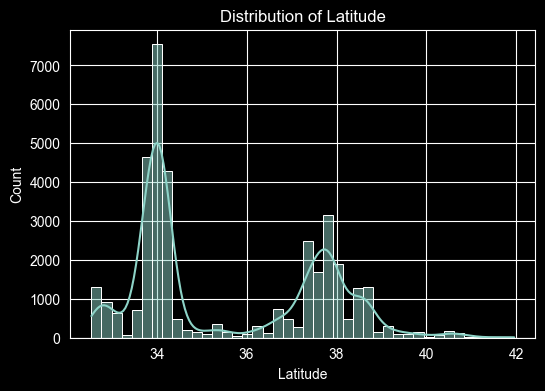

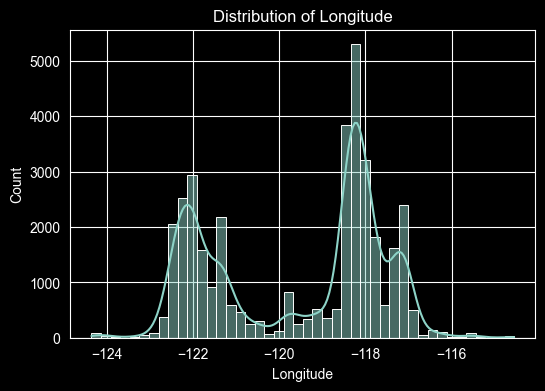

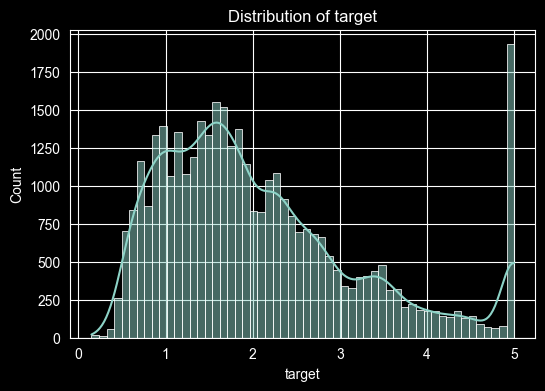

In [17]:
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [5]:
# degree=3 — больше признаков, может улучшить MAE (попробуй заменить 2 на 3)
poly = PolynomialFeatures(degree=3, include_bias=False)

In [6]:
# Исходные признаки и target
X_orig = df.drop("target", axis=1)
y = df["target"]

# Полиномиальные признаки
X_poly = poly.fit_transform(X_orig)

feature_names = poly.get_feature_names_out(X_orig.columns)

# Возвращаем в DataFrame
X = pd.DataFrame(X_poly, columns=feature_names, index=df.index)

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# LINEAR REGRESSION

In [9]:
# Быстрая проверка Ridge с малыми alpha (цель MAE ≤ 0.45)
print("Ridge с разными alpha:")
for a in [0.0001, 0.001, 0.01, 0.05, 0.1]:
    m = Ridge(alpha=a).fit(X_train, y_train)
    mae = mean_absolute_error(y_test, m.predict(X_test))
    print(f"  alpha={a}: MAE={mae:.4f}")

Ridge с разными alpha:
  alpha=0.0001: MAE=0.4835
  alpha=0.001: MAE=0.4836
  alpha=0.01: MAE=0.4848
  alpha=0.05: MAE=0.4871
  alpha=0.1: MAE=0.4883


In [10]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')

MAE: 0.48


In [11]:
feats = pd.DataFrame(lin_reg.coef_, index=X.columns, columns=['coeffs'])
feats

,coeffs
MedInc,14.100872
HouseAge,274.679152
AveRooms,-56.111793
AveBedrms,40.176293
Population,6.268722
...,...
AveOccup Longitude^2,-578.391576
Latitude^3,242.678683
Latitude^2 Longitude,1467.299015
Latitude Longitude^2,3198.096198


# LASSO REGRESSION (L1)

In [20]:
lasso_reg = Lasso(alpha=0.001, max_iter=200000)

lasso_reg.fit(X_train, y_train)
y_pred = lasso_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')

MAE: 0.50


In [13]:
feats = pd.DataFrame(lasso_reg.coef_, index=X.columns, columns=['coeffs'])
feats

,coeffs
MedInc,0.252227
HouseAge,0.000000
AveRooms,-0.000000
AveBedrms,0.000000
Population,-0.000000
...,...
AveOccup Longitude^2,-0.000000
Latitude^3,-0.000000
Latitude^2 Longitude,0.000000
Latitude Longitude^2,-0.000000


# RIDGE REGRESSION (L2)


In [14]:
ridge_reg = Ridge(alpha=0.05)

ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')

MAE: 0.49


In [15]:
feats = pd.DataFrame(ridge_reg.coef_, index=X.columns, columns=['coeffs'])
feats

,coeffs
MedInc,-7.443675
HouseAge,-3.164391
AveRooms,4.087972
AveBedrms,-1.339222
Population,-0.463529
...,...
AveOccup Longitude^2,-7.680994
Latitude^3,8.633173
Latitude^2 Longitude,6.075573
Latitude Longitude^2,-3.668785


# Elastic Net

In [16]:
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.1)

elastic_net.fit(X_train, y_train)
y_pred = elastic_net.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')

MAE: 0.51
